### import python libraries

The script below is used to import necessary libraries for data analysis and visualization.
It includes libraries for numerical operations, data manipulation, and plotting.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os
from zipfile import ZipFile
import plotly.express as px
import plotly.io as pio



### Extract and load datasets from csv file into DataFrame
This code snippet reads the csv file datasets downloaded from Kaggle

In [115]:
df = pd.read_csv('datasets/insurance.csv')

### Data Exploration
This gets the dimensions of the DataFrame 

In [116]:

df.shape

(1338, 7)

This is used to get the first 5 rows of the dataframe

In [117]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


Format columns with floats to 3 decimal places 

In [118]:
pd.set_option('display.float_format', '{:.3f}'.format)
df.head()
df['bmi'] = df['bmi'].map('{:.3f}'.format)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


This is used to get the summary information of the datasets

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   object 
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


This shows the entire columns in the DataFrame totalling 7 columns.

In [120]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

This returns the index (row labels) of the DataFrame

In [121]:
df.index

RangeIndex(start=0, stop=1338, step=1)

This returns the last 5 rows of the DataFrame by default

In [122]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945
1337,61,female,29.070,0,yes,northwest,29141.360


This checks for missing values in the DataFrame and returns result as true if there are missing values
* There are no missing values as it stands

In [123]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


This is a summary of the result when missing values check is done by .isnull() function

In [124]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This illustrates the summary descriptive statistics of the DataFrame 

In [125]:
df.describe()

,age,children,charges
count,1338.000,1338.000,1338.000
mean,39.207,1.095,13270.422
std,14.050,1.205,12110.011
min,18.000,0.000,1121.874
25%,27.000,0.000,4740.287
50%,39.000,1.000,9382.033
75%,51.000,2.000,16639.913
max,64.000,5.000,63770.428


This checks for duplicated values in the columns and returns boolean True if there are and in this case, there are no duplicated values but this only displays the first 5 and last rows and i would have to run a .sum() to get a bigger picture

In [126]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

This check is done to give a summary of duplicated values if there are any and in this case, there is 1 duplicated value

In [127]:
df.duplicated().sum()

1

### Data Cleaning

drop duplicate values and recheck for duplicate value

In [128]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Normalise Data Types

Encode categorical variables  using pandas get_dummies

In [129]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.924,False,True,False,False,True
1,18,33.770,1,1725.552,True,False,False,True,False
2,28,33.000,3,4449.462,True,False,False,True,False
3,33,22.705,0,21984.471,True,False,True,False,False
4,32,28.880,0,3866.855,True,False,True,False,False


In [130]:

def bmi_category(bmi):
    bmi = float(bmi)
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df.loc[:, 'total body mass index category'] = df['bmi'].apply(bmi_category)
df.head()

,age,sex,bmi,children,smoker,region,charges,total body mass index category
0,19,female,27.900,0,yes,southwest,16884.924,Overweight
1,18,male,33.770,1,no,southeast,1725.552,Obese
2,28,male,33.000,3,no,southeast,4449.462,Obese
3,33,male,22.705,0,no,northwest,21984.471,Normal weight
4,32,male,28.880,0,no,northwest,3866.855,Overweight


In [131]:
# i.a. Average insurance charges by age
avg_charges_by_age = df.groupby('age')['charges'].mean()
print("Average insurance charges by age:")
print(avg_charges_by_age)

# i.b. Average insurance charges by gender
avg_charges_by_gender = df.groupby('sex')['charges'].mean()
print("\nAverage insurance charges by gender:")
print(avg_charges_by_gender)

# i.c. Average insurance charges by region
avg_charges_by_region = df.groupby('region')['charges'].mean()
print("\nAverage insurance charges by region:")
print(avg_charges_by_region)

Average insurance charges by age:
age
18    7086.218
19    9868.929
20   10159.698
21    4730.464
22   10012.933
23   12419.820
24   10648.016
25    9838.365
26    6133.825
27   12184.702
28    9069.188
29   10430.159
30   12719.110
31   10196.981
32    9220.300
33   12351.533
34   11613.528
35   11307.182
36   12204.476
37   18019.912
38    8102.734
39   11778.243
40   11772.251
41    9653.746
42   13061.039
43   19267.279
44   15859.397
45   14830.200
46   14342.591
47   17654.000
48   14632.500
49   12696.006
50   15663.003
51   15682.256
52   18256.270
53   16020.931
54   18758.546
55   16164.545
56   15025.516
57   16447.185
58   13878.928
59   18895.870
60   21979.419
61   22024.458
62   19163.857
63   19884.998
64   23275.531
Name: charges, dtype: float64

Average insurance charges by gender:
sex
female   12569.579
male     13974.999
Name: charges, dtype: float64

Average insurance charges by region:
region
northeast   13406.385
northwest   12450.841
southeast   14735.411
southw

### Basic visualisations using matplotlib, seaborn and plotly to show distribution and correlation of relevant personal features to insurance charges

Interactive Age VS Smoking status(smoker vs non-smoker)

In [132]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'blue'},
    title='Interactive Age vs. Charges by Smoking Status',
    labels={'age': 'Age', 'charges': 'Charges'},
    hover_data=['bmi', 'children', 'region']
)

fig.update_layout(template='plotly_white')
fig.show()


correlation of personal features with insurance charges using a diverging horizontal barplot with matplotlib

In [133]:

features_of_interest = ['age', 'sex_male', 'bmi', 'children', 'smoker_yes',
                        'region_northwest', 'region_southeast', 'region_southwest']



Ensure all selected features exist in the DataFrame

In [134]:
missing_features = [feature for feature in features_of_interest if feature not in df_encoded.columns]
if missing_features:
    raise KeyError(f"The following features are missing in the DataFrame: {missing_features}")


Convert 'bmi' to numeric if it's not already

In [135]:
df_encoded['bmi'] = pd.to_numeric(df_encoded['bmi'], errors='coerce')

Compute correlation with insurance charges

In [136]:
correlations = df_encoded[features_of_interest + ['charges']].corr()['charges'].drop('charges')
correlations = correlations.sort_values()

Prepare DataFrame for plotting

In [137]:
corr_df = correlations.reset_index()
corr_df.columns = ['Feature', 'Correlation']
corr_df['Color'] = corr_df['Correlation'].apply(lambda x: 'green' if x > 0 else 'red')


 Plot horizontal diverging bar chart using Matplotlib and also to add aethestics

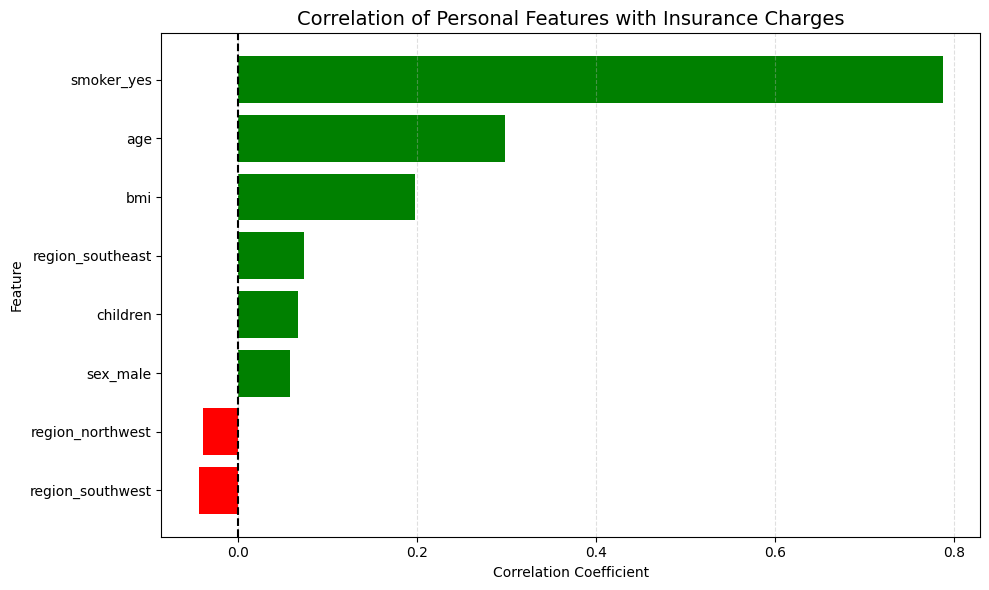

In [138]:
plt.figure(figsize=(10, 6))
bars = plt.barh(corr_df['Feature'], corr_df['Correlation'], color=corr_df['Color'])

plt.axvline(0, color='black', linestyle='--')
plt.title('Correlation of Personal Features with Insurance Charges', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### A map showing the distribution of insurance cost based on geographic regions
Map regions to U.S. states

In [139]:
region_state_map = {
    'southeast': 'FL',
    'southwest': 'TX',
    'northeast': 'NY',
    'northwest': 'WA'
}

Ensure the 'region' column is mapped correctly

In [140]:
df['state'] = df['region'].map(region_state_map)

Check for unmapped regions

In [141]:
unmapped_regions = df['region'][df['state'].isnull()].unique()
if len(unmapped_regions) > 0:
    raise ValueError(f"The following regions are not mapped to any U.S. state: {unmapped_regions}")

Compute average charges by state

In [142]:
state_avg = df.groupby('state')['charges'].mean().reset_index()


Distribution of insurance charges among different regions

In [143]:
fig = px.choropleth(
    state_avg,
    locations='state',
    locationmode='USA-states',
    color='charges',
    color_continuous_scale='Blues',
    scope='usa',
    title=' Average Insurance Charges by Region (Mapped to US States)',
    labels={'charges': 'Avg Charges'},
    hover_data={'state': True, 'charges': ':.2f'}
)

fig.update_layout(
    geo=dict(
        showcoastlines=True,
        showland=True,
        landcolor='lightgray'
    ),
    template='plotly_white',
    coloraxis_colorbar=dict(
        title='Avg Charges',
        tickprefix='$',
        lenmode='fraction',
        len=0.75
    ),
    legend_title_text='State'
)

fig.show()
